#**The Sparks Foundation**
## **Prediction using Supervised ML**
**By Aagaaz Ali Sayed**

1. **Importing the required libraries and loading the data.**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)

**2. Exploring the data**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.shape

(25, 2)

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**3. Plotting the data**

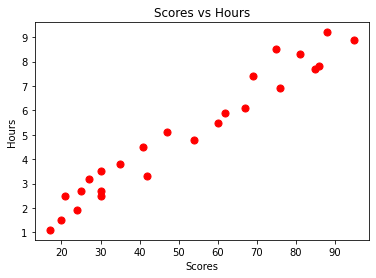

In [8]:
plt.scatter(df['Scores'], df['Hours'], s = 50, c = 'red')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.title('Scores vs Hours')
plt.show()

There is a linear relation between the dependent and independent variable so a linear regression model would fit well.

**4. Splitting into X and Y**

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:,1].values

Splitting into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True, random_state = 0)

**5. Training the data**

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the regression line

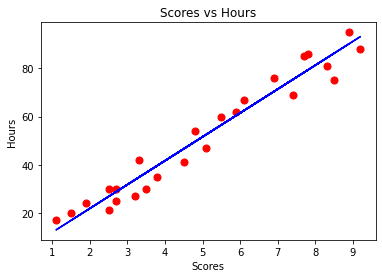

In [12]:
line = lin_reg.coef_*X + lin_reg.intercept_
plt.plot(X, line, c = 'blue')
plt.scatter(X, y, s = 50, c = 'red')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.title('Scores vs Hours')
plt.show()

**6. Predicting for train and test and calculating rmse and r2 score**

In [13]:
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

In [14]:
from sklearn.metrics import r2_score, mean_squared_error as mse

In [15]:
def evaluate_model(name):
  rmse_tr = np.sqrt(mse(y_train, train_pred))
  print(f"{name} : RMSE Train of = {rmse_tr:.4f}")

  rmse_te = np.sqrt(mse(y_test, test_pred))
  print(f"{name} : RMSE Test of = {rmse_te:.4f}")

  r2_sc_train = r2_score(y_train, train_pred)
  print(f"{name} : R2 Score Train = {r2_sc_train:.4f}")

  r2_sc_test = r2_score(y_test, test_pred)
  print(f"{name} : R2 Score Test = {r2_sc_test:.4f}")

In [16]:
evaluate_model('Linear Regression')

Linear Regression : RMSE Train of = 5.5586
Linear Regression : RMSE Test of = 4.6474
Linear Regression : R2 Score Train = 0.9516
Linear Regression : R2 Score Test = 0.9455


In [17]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicting for the given number of hours

In [18]:
def pred(hours):
  hrs = np.array(hours).reshape(-1,1)
  hr_pred = lin_reg.predict(hrs)
  print(f'Number of hours : {hours}')
  print(f'Score predicted : {hr_pred[0]}')

In [19]:
pred(9.25)

Number of hours : 9.25
Score predicted : 93.69173248737539
